### Exploratory Data Analysis

In [2]:
import pandas as pd
import sweetviz as sv

In [3]:
train = pd.read_csv('Data/train.csv')

In [4]:
test = pd.read_csv('Data/test.csv')

In [34]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### An overview of the data

In [5]:
n = train.shape[0]
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df['Loan_ID'].value_counts()

Loan_ID
LP001002    1
LP001183    1
LP001187    1
LP001190    1
LP001203    1
           ..
LP002098    1
LP002100    1
LP002101    1
LP002103    1
LP002989    1
Name: count, Length: 981, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [53]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Missing Values and Duplicates

In [38]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [39]:
df.duplicated().sum()

0

### Loan status distribution

In [13]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Loan applications having dependents

In [9]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [10]:
train[train['Dependents'] != '0']['Loan_ID'].count()

269

### Income of those employed vs Income of self-employed

In [11]:
income_employed = train[train['Self_Employed'] == 'No']['ApplicantIncome'].mean()

income_self_employed = train[train['Self_Employed'] == 'Yes']['ApplicantIncome'].mean()

print("Mean Income of employed:",income_employed) 

print("Mean Income of self-employed:",income_self_employed) 


Mean Income of employed: 5049.748
Mean Income of self-employed: 7380.817073170731


### Applicants with credit history more likely to default than those who do not?

In [44]:
credit_history = pd.crosstab(train['Credit_History'], train['Loan_Status'], margins=True, margins_name='Total')

credit_history

Loan_Status,N,Y,Total
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
Total,179,385,564


### Correlation between applicant's income and loan amount

In [45]:
correlation = train['ApplicantIncome'].corr(train['LoanAmount'])

print("Correlation between applicant's income and loan amount applied for:",correlation)

Correlation between applicant's income and loan amount applied for: 0.5709090389885667


In [18]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [21]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Feature Correlation to Loan Status

In [35]:
corr_df  = pd.get_dummies(train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]).corr()

In [36]:
corr_df['Loan_Status'].sort_values().iloc[1:-1]

Married_No                -0.091478
Education_Not Graduate    -0.085884
CoapplicantIncome         -0.059187
Property_Area_Urban       -0.043621
Dependents_1              -0.038740
LoanAmount                -0.037318
Dependents_3+             -0.026123
Loan_Amount_Term          -0.021268
Gender_Female             -0.017987
Self_Employed_No          -0.005857
ApplicantIncome           -0.004710
Self_Employed_Yes         -0.003700
Dependents_0               0.006250
Gender_Male                0.025407
Dependents_2               0.062384
Married_Yes                0.084281
Education_Graduate         0.085884
Property_Area_Semiurban    0.136540
Credit_History             0.561678
Name: Loan_Status, dtype: float64

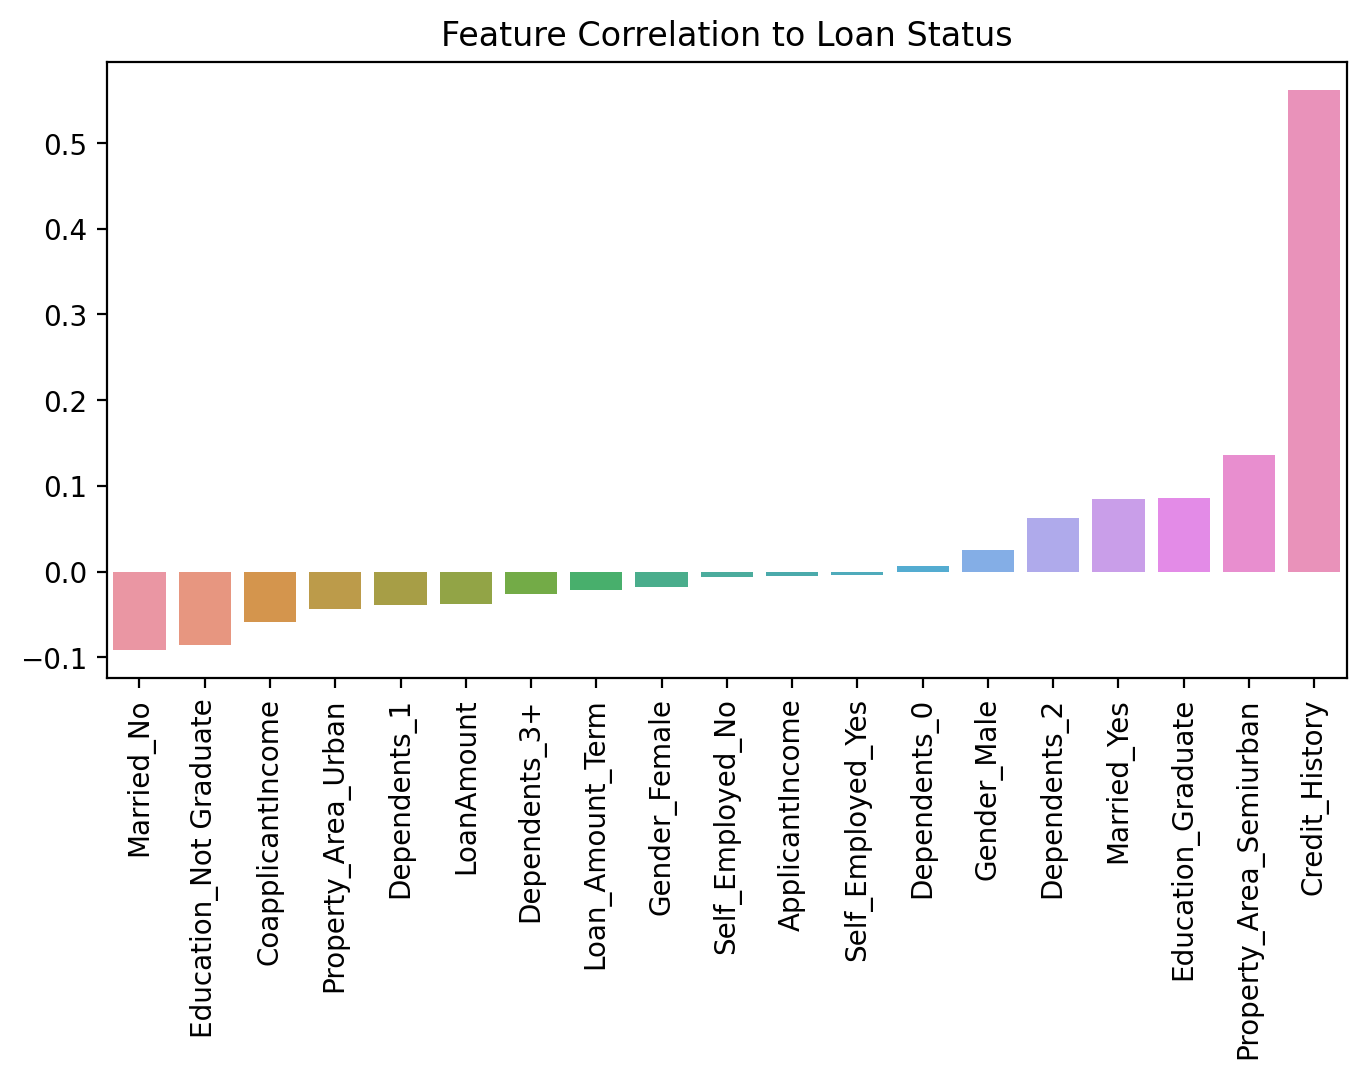

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=corr_df['Loan_Status'].sort_values().iloc[1:-1].index,y=corr_df['Loan_Status'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Loan Status")
plt.xticks(rotation=90);

### Auto - EDA

In [46]:
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


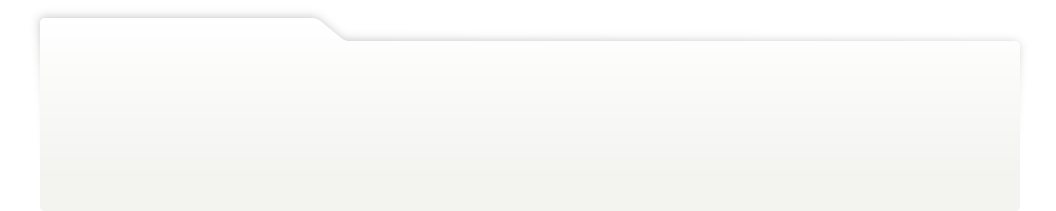
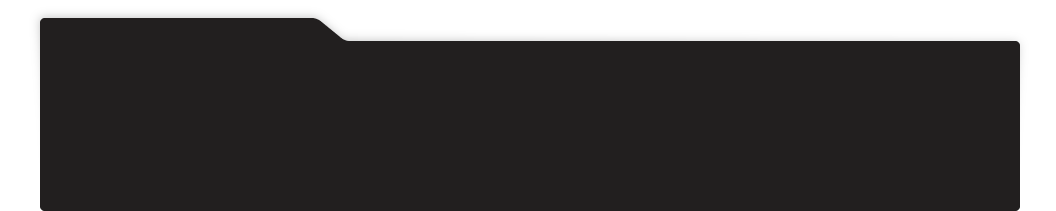
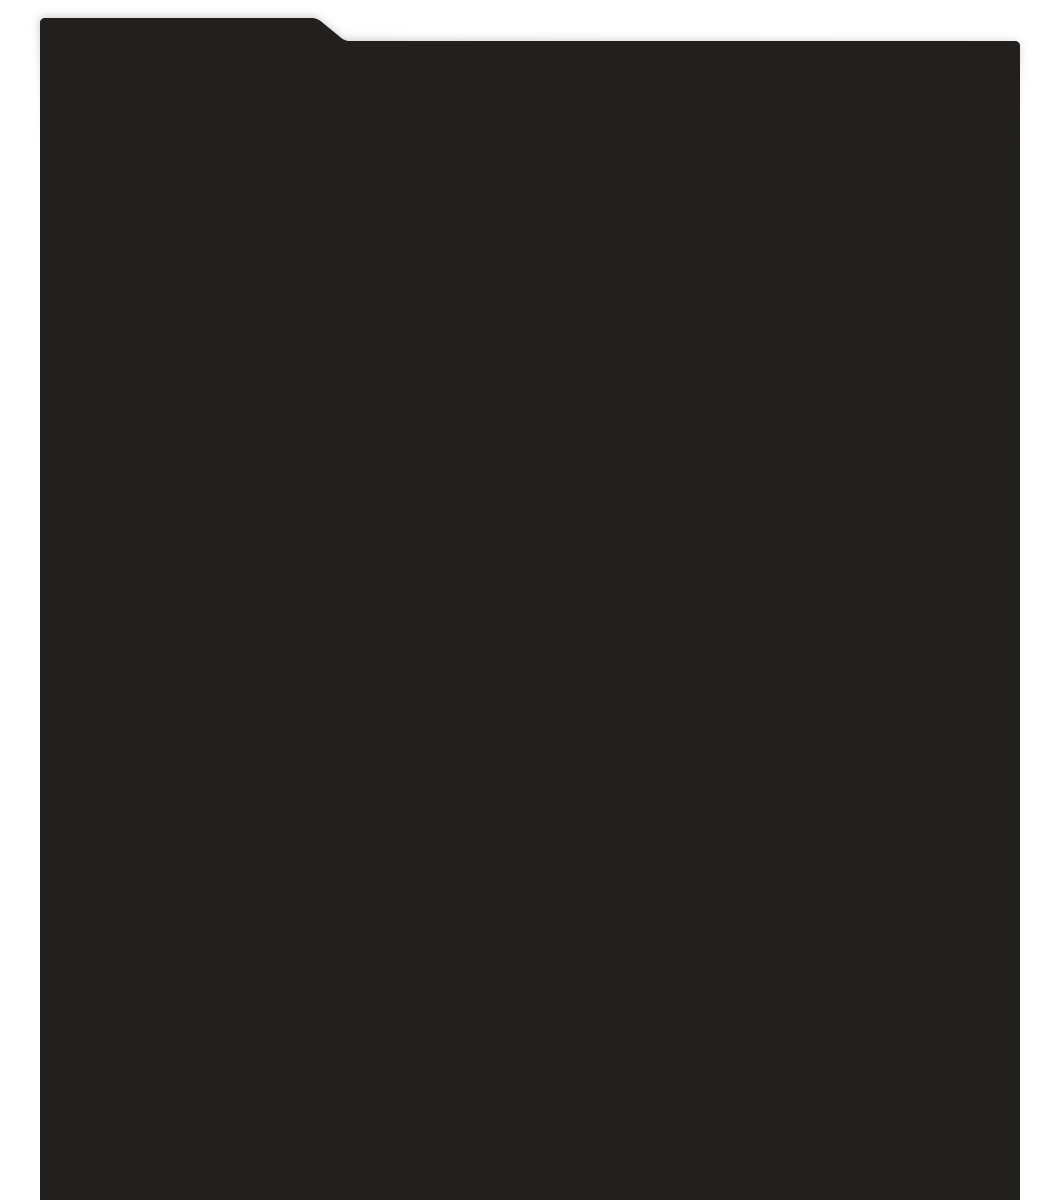
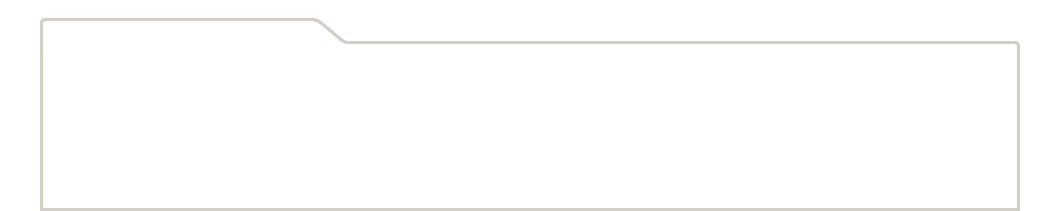
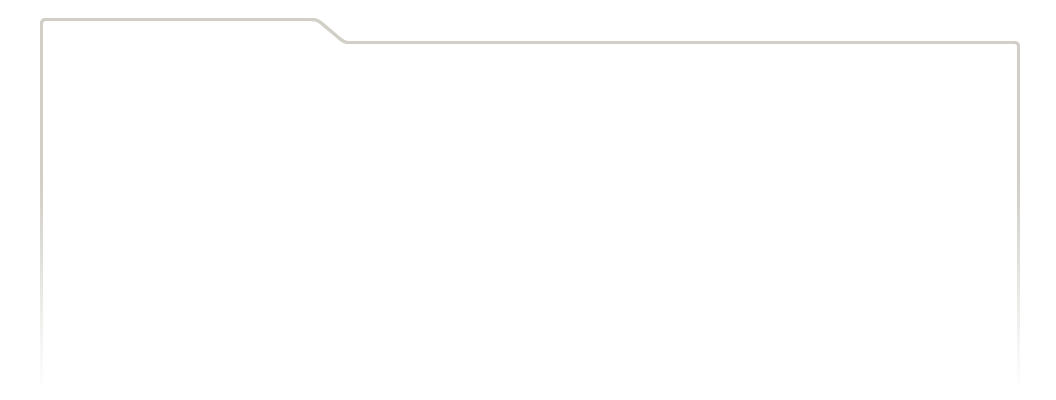
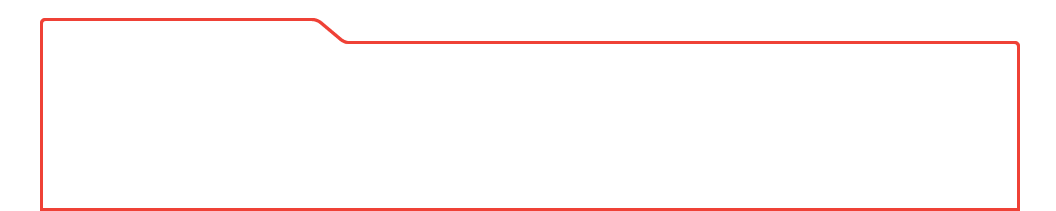
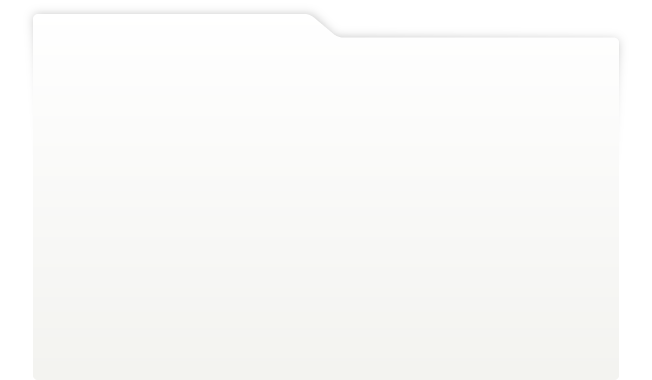
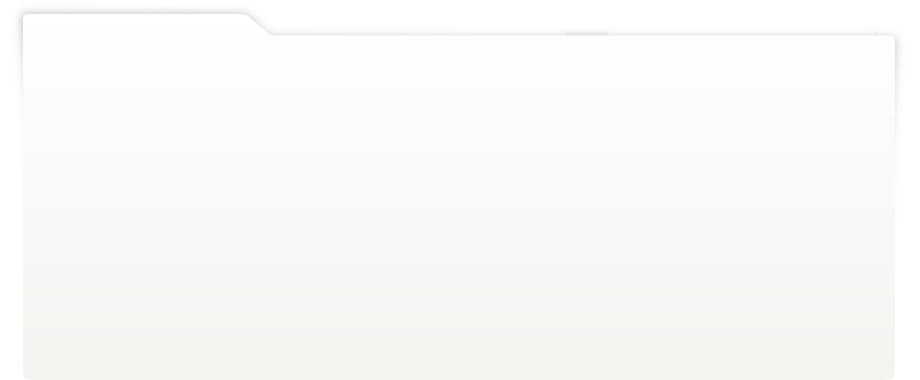
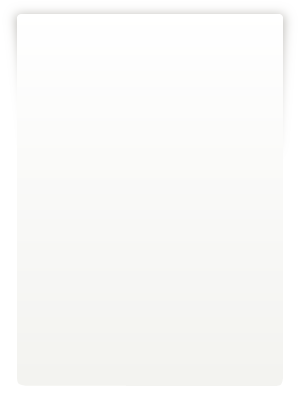
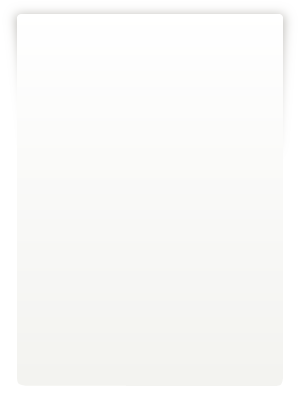
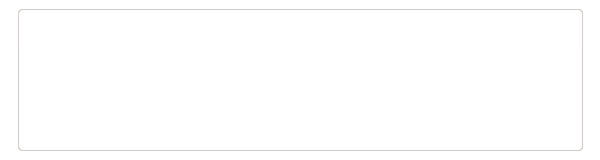
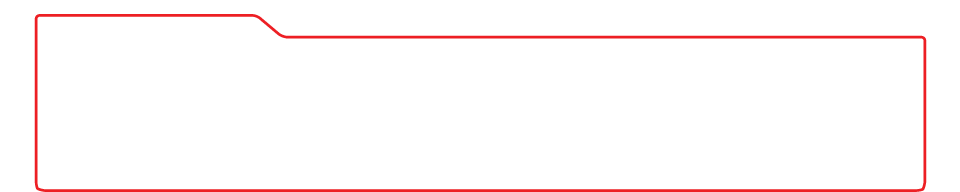
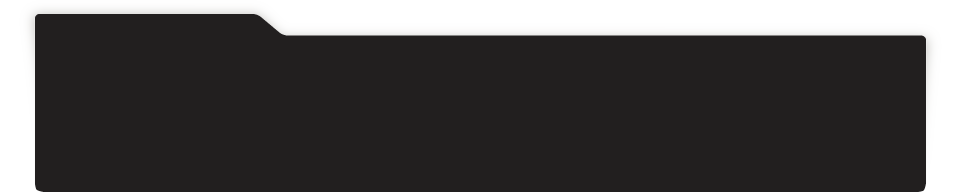
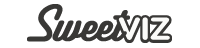
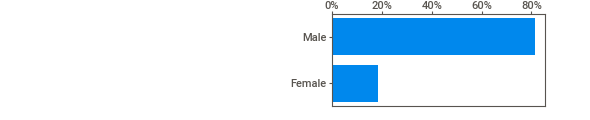
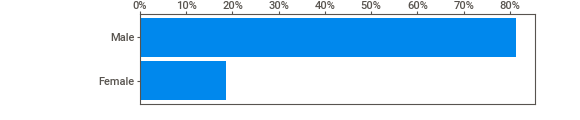
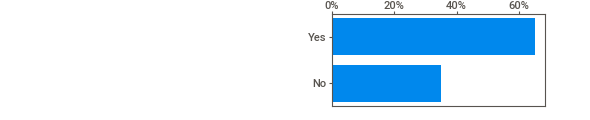
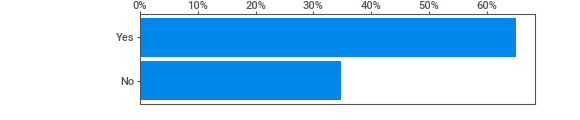
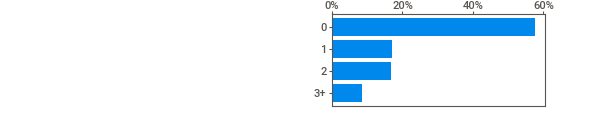
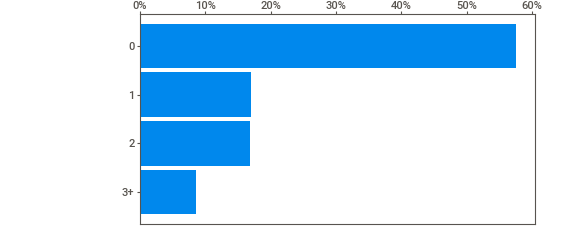
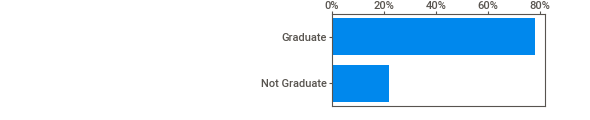
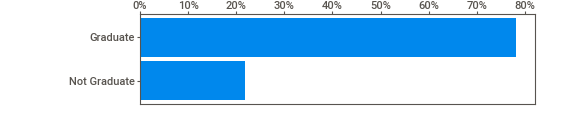
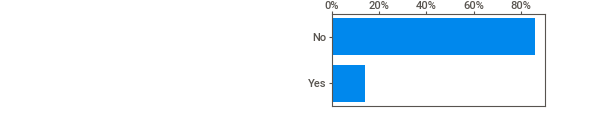
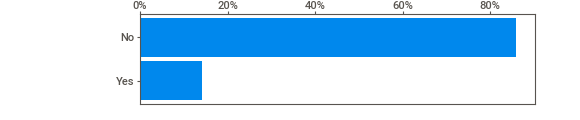
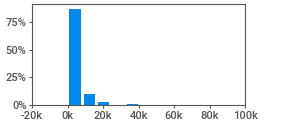
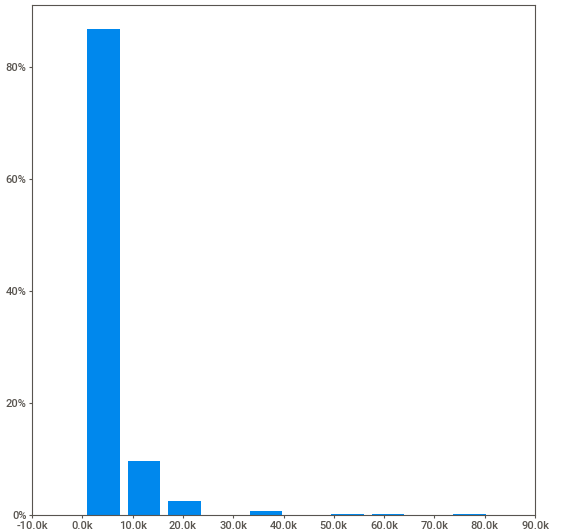
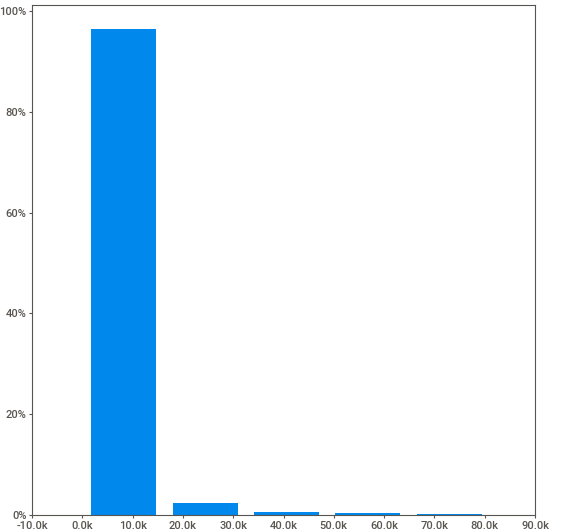
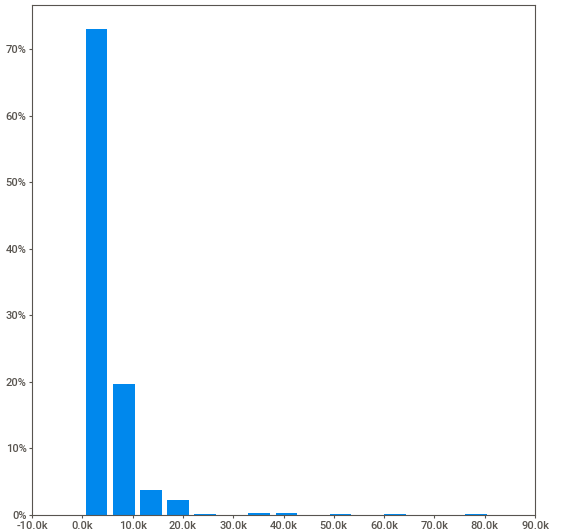
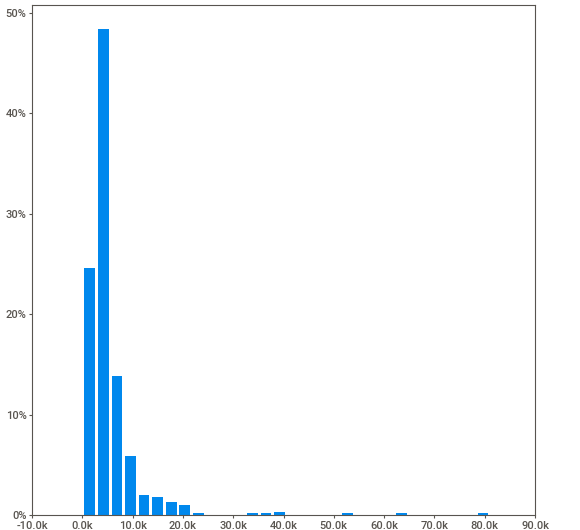
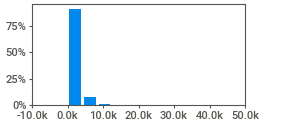
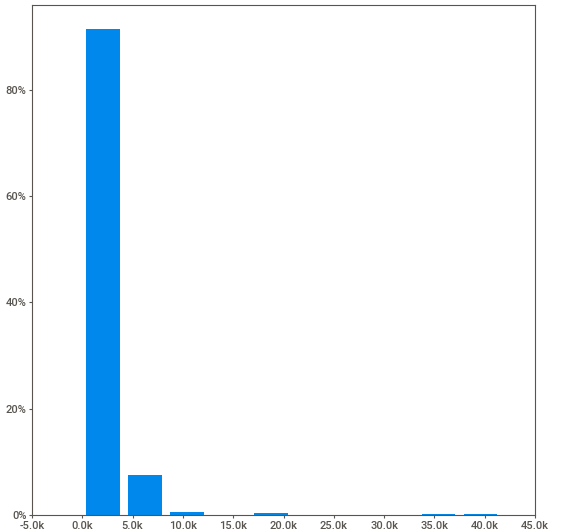
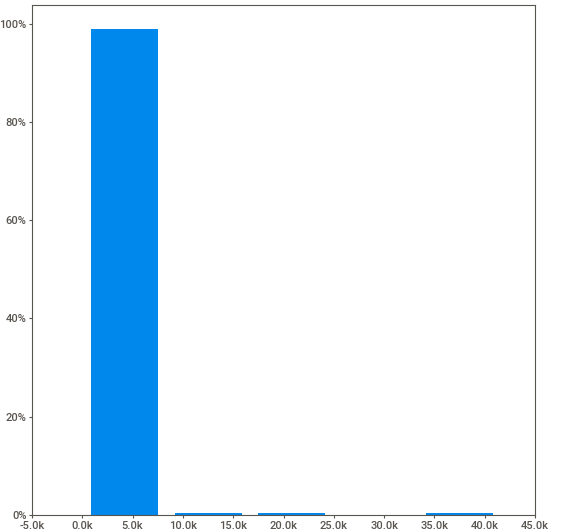
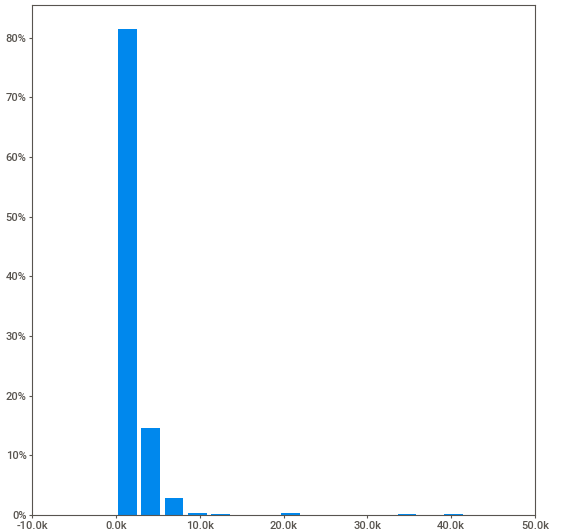
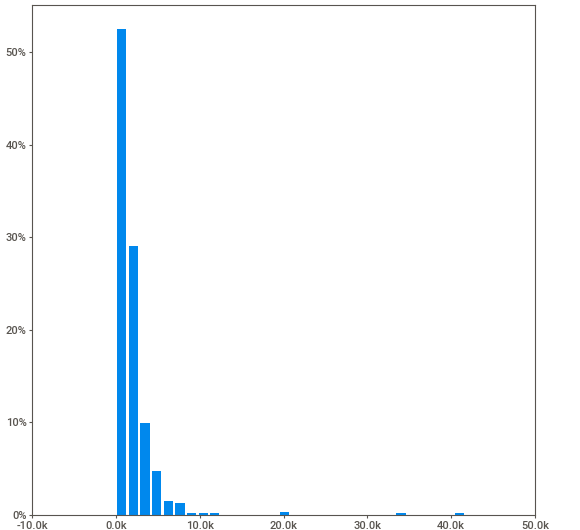
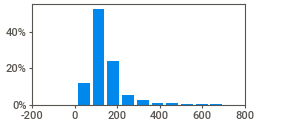
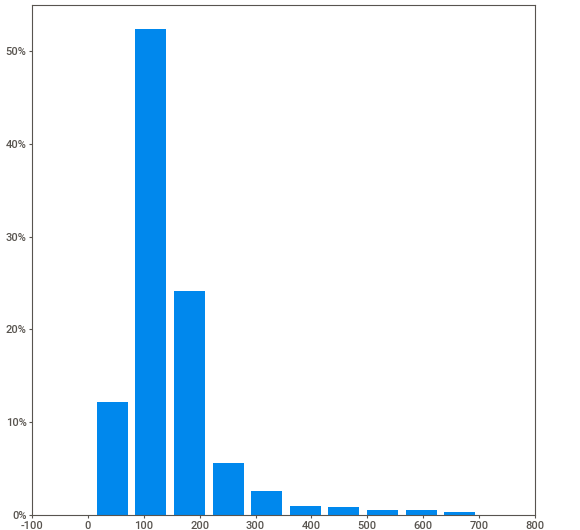
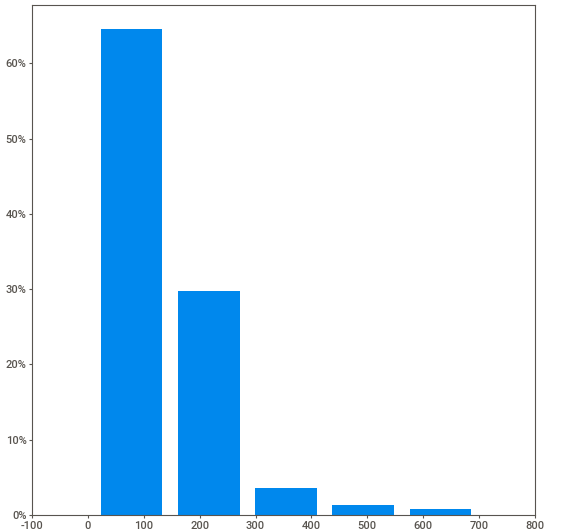
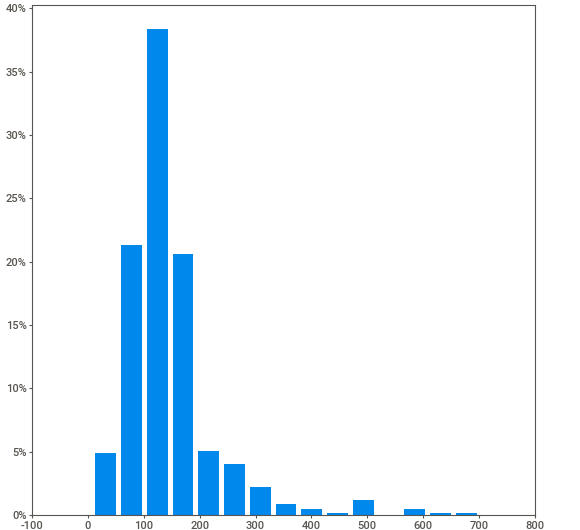
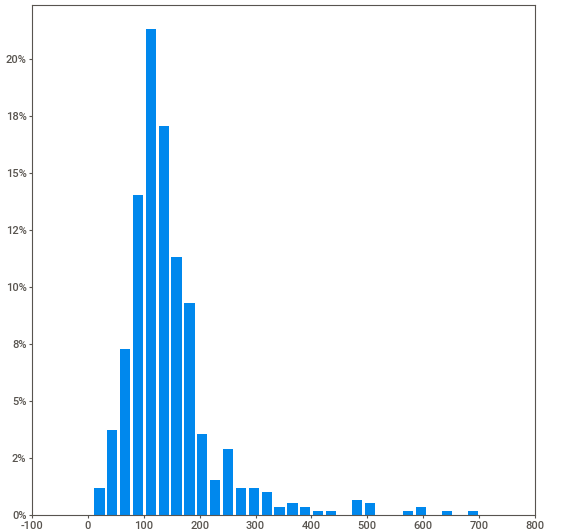
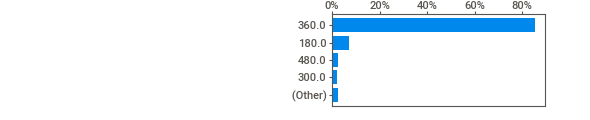
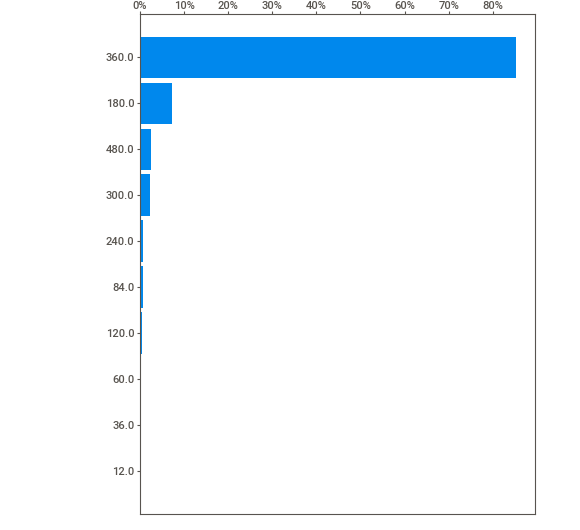
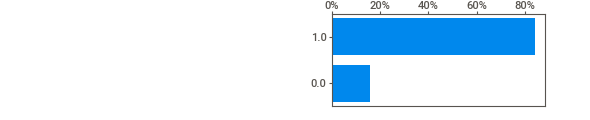
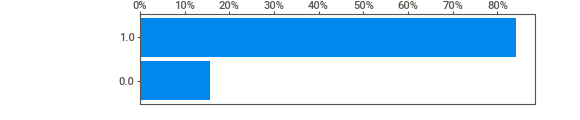
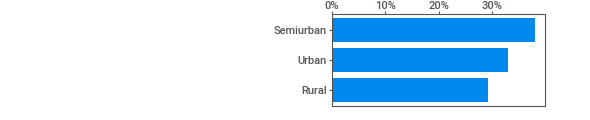
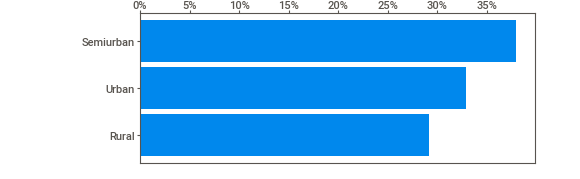
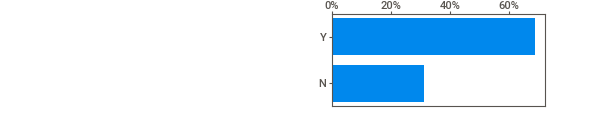
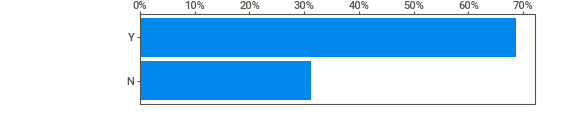
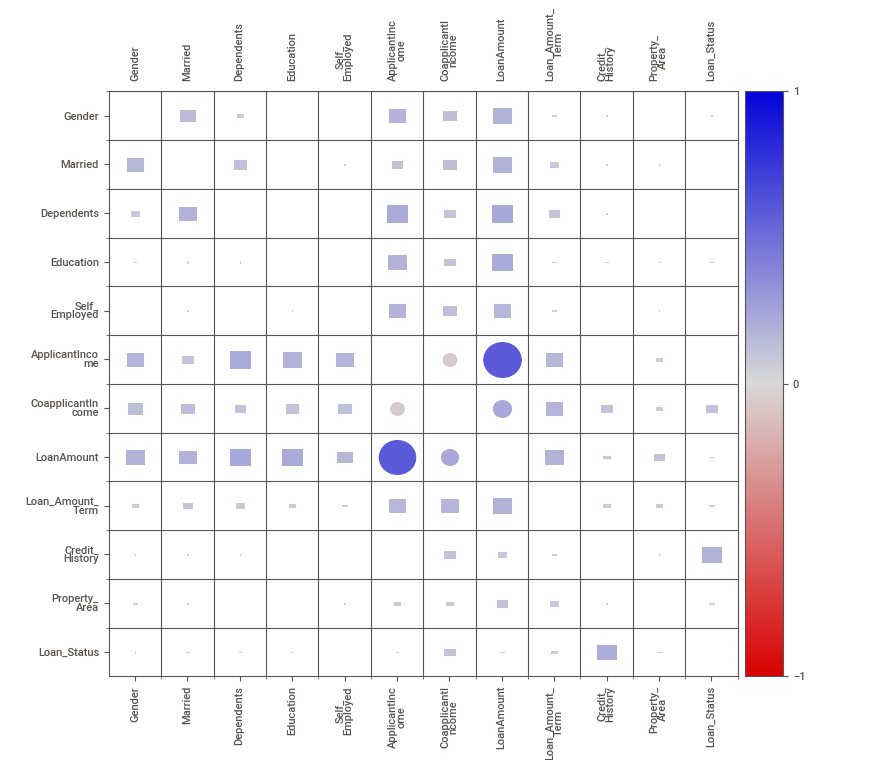
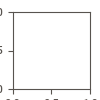

In [47]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Bespoke ML

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tpot import TPOTClassifier

In [49]:
# Categorical variables were handled (example for 'Gender' column)
encoder = OneHotEncoder()
gender_encoded = encoder.fit_transform(train[['Gender']])
# The same encoding was applied to the test data

# Numerical features were standardized (example for 'ApplicantIncome' column)
scaler = StandardScaler()
train['ApplicantIncome'] = scaler.fit_transform(train[['ApplicantIncome']])
test['ApplicantIncome'] = scaler.transform(test[['ApplicantIncome']])

# The train dataset was split into features (X) and the target variable (y)
X_train = train.drop(columns=['Loan_Status'])
y_train = train['Loan_Status']


In [50]:
# The dataset was split into a training set and a validation set
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Random Forest Classifier

In [51]:
# Categorical variables were handled (example for 'Gender' column)
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Transformers for categorical and numerical columns were created
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Missing values were imputed with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Missing values were imputed with the mean
])

# Transformers were combined using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# The model (Random Forest Classifier) was defined
model = RandomForestClassifier(random_state=42)

# A pipeline was created and fitted
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# The model was trained on the training set
clf.fit(X_train_split, y_train_split)

# Predictions were made on the validation set
y_val_pred = clf.predict(X_val)

# The model was evaluated
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           N       0.83      0.44      0.58        43
           Y       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



### Auto-ML using TPOT

In [52]:
# Categorical and numerical columns were defined
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Transformers for numerical and categorical columns were defined
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Missing values were imputed with median
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Missing values were imputed with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Categorical variables were encoded
])

# Transformers were combined using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# TPOTClassifier was created and configured
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    random_state=42,
    config_dict='TPOT sparse'
)

# The training and validation data were preprocessed
X_train_preprocessed = preprocessor.fit_transform(X_train_split)
X_val_preprocessed = preprocessor.transform(X_val)

# TPOT was fitted on the preprocessed training data
tpot.fit(X_train_preprocessed, y_train_split)

# The best pipeline found by TPOT was obtained
best_pipeline = tpot.fitted_pipeline_

# Predictions were made on the preprocessed validation set
y_val_pred_tpot = best_pipeline.predict(X_val_preprocessed)

# The TPOT-generated model was evaluated
accuracy_tpot = accuracy_score(y_val, y_val_pred_tpot)
report_tpot = classification_report(y_val, y_val_pred_tpot)
print(f"TPOT-generated Model Accuracy: {accuracy_tpot}")
print(report_tpot)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8166357452071737

Generation 2 - Current best internal CV score: 0.8166357452071737

Generation 3 - Current best internal CV score: 0.8166357452071737

Generation 4 - Current best internal CV score: 0.8166357452071737

Generation 5 - Current best internal CV score: 0.8166357452071737

Best pipeline: LinearSVC(input_matrix, C=1.0, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05)
TPOT-generated Model Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

